In [1]:
# WARNING: PATH NAMES TO EXPERIMENTS RESULTS NEED TO BE UPDATED MANUALLY

In [2]:
import pandas as pd
%matplotlib inline
import pandas as pd
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
%ls ../experiments_results/

POS/       gaussianA/ gaussianB/ gaussianC/ kosarak/   synthetic/


In [4]:
# Edit me!
case = 'gaussianA' #gaussianA|gaussianB|gaussianC
no_scale = False
draw_empirical_mean = True
compare_to_empirical_mean = False
display_rhos = [1/8, 1., 0.01]#[1/8, 1/2, 1., 0.01]

bincase = 'POS' # kosarak | POS

In [5]:
palette = sns.color_palette("colorblind")
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [6]:
# Algorithm names and universal settings
us = 'PLAN'
noscale= 'noscale'
us_noscale = 'PLAN ({noscale})'.format(noscale=noscale)
them = 'IOME'#'Instance optimal'
baseline = 'Empirical mean'#'Empirical mean (non-private)'
us_color = palette[2]
us_noscale_color = palette[4]
them_color = palette[1]
baseline_color = palette[9]

thickness = 2.5

global_font_scale = 2.5
fig_scale = 1. 
figsize = (6*fig_scale, 4.5*fig_scale)
fontsize=36

no_legend = False#True

optional_filename_suffix = ''

display_ratios = [1/4, 1/2, 1.] #[1/4, 1/2, 3/4]

In [7]:
if 'gaussianA' in case:
    xticks = [16, 32, 64, 128, 256, 512, 1024, 2048]
    x = 'd'
    xlabel = '$d$'
    xscale = 'log'
    yscale = 'log'
    
if 'gaussianC' in case:
    xticks = [16, 32, 64, 128, 256, 512, 1024, 2048]
    x = 'd'
    xlabel = '$d$'
    xscale = 'log'
    yscale = 'log'#'linear'
    #optional_filename_suffix = '-compare-to-empirical'
    
if 'gaussianB' in case:
    xticks = [0, 0.5, 1, 1.5, 2]
    x = 'r'
    xlabel = r'$\alpha$'
    xscale = 'linear'
    yscale = 'log'

csv = '../experiments_results/{case}/dataframe{optional}.csv'.format(case=case, optional=optional_filename_suffix)
suffix = ''
if no_scale:
    suffix = '-no-scale'
    
plot_name = '../experiments_results/{case}/{case}{suffix}.pdf'.format(case=case, suffix=suffix)
df = pd.read_csv(csv)


In [8]:
df=df.drop_duplicates() # Defensive!
plot_df = df[['Algorithm', 'd', 'n', 'rho', 'r', 'mean', 'error']]

In [9]:
plot_df = plot_df.replace('PLAN', us)
plot_df = plot_df.replace('PLAN-NOSCALE', us_noscale)
plot_df = plot_df.replace('Instance optimal', them)
plot_df = plot_df.replace('Empirical mean (non-private)', baseline)

plot_df['Algorithm'] = plot_df['Algorithm'] + ' ' + plot_df['rho'].astype(str)

In [10]:
# Filter rhos
plot_df = plot_df[plot_df.rho.isin(display_rhos)]

In [11]:
# Filter no scale/empirical mean
if not no_scale:
    plot_df=plot_df[~plot_df.Algorithm.str.contains(noscale)]


In [12]:
empirical_means_df = plot_df[plot_df.Algorithm.str.contains(baseline)]
empirical_means_df.loc[empirical_means_df.Algorithm.str.contains(baseline), 'Algorithm']=baseline
plot_df=plot_df[~plot_df.Algorithm.str.contains(baseline)]

In [13]:
if compare_to_empirical_mean:

    baseline_df = empirical_means_df.groupby(['d']).mean()
    baseline_df=baseline_df[['error']]
    baseline_df=baseline_df.reset_index(level=0)

    # Subtract the mean value for the estimate of the empirical mean
    for d in plot_df.d.unique():
        plot_df.loc[plot_df.d==d, 'error'] -= baseline_df[baseline_df.d==d]['error'].iloc[0]

    #Absolute value
    plot_df['error'] = plot_df['error'].abs()

In [14]:
pd.options.display.max_rows = 120

In [15]:
plot_df.groupby(['Algorithm', 'd', 'n', 'rho', 'r', 'mean']).describe()

error                       \
                                               count      mean        std   
Algorithm               d    n    rho   r mean                              
IOME 0.125              16   4000 0.125 0 0     50.0  0.071933   0.024822   
                        32   4000 0.125 0 0     50.0  0.100963   0.017336   
                        64   4000 0.125 0 0     50.0  0.151126   0.014217   
                        128  4000 0.125 0 0     50.0  0.242361   0.018072   
                        256  4000 0.125 0 0     50.0  0.401865   0.018823   
                        512  4000 0.125 0 0     50.0  0.717600   0.022030   
                        1024 4000 0.125 0 0     50.0  1.373787   0.047355   
                        2048 4000 0.125 0 0     50.0  3.886883   0.252916   
IOME 1.0                16   4000 1.000 0 0     50.0  0.064004   0.010189   
                        32   4000 1.000 0 0     50.0  0.090792   0.011557   
                        64   4000 1.000 0 0     50.0  0.134683   0.010896   
                        128  4000 1.000 0 0     50.0  0.186344   0.011595   
                        256  4000 1.000 0 0     50.0  0.276085   0.010353   
                        512  4000 1.000 0 0     50.0  0.421329   0.011212   
                        1024 4000 1.000 0 0     50.0  0.667674   0.016134   
                        2048 4000 1.000 0 0     50.0  1.126041   0.021876   
PLAN-E-ULTIMATE++ 0.125 16   4000 0.125 0 0     50.0  0.067493   0.012086   
                        32   4000 0.125 0 0     50.0  0.106317   0.015390   
                        64   4000 0.125 0 0     50.0  0.163306   0.014224   
                        128  4000 0.125 0 0     50.0  0.263022   0.015224   
                        256  4000 0.125 0 0     50.0  0.449403   0.017978   
                        512  4000 0.125 0 0     50.0  0.812035   0.027786   
                        1024 4000 0.125 0 0     50.0  1.626524   0.164784   
                        2048 4000 0.125 0 0     50.0  8.483883  13.119088   
PLAN-E-ULTIMATE++ 1.0   16   4000 1.000 0 0     50.0  0.064105   0.009924   
                        32   4000 1.000 0 0     50.0  0.090569   0.012105   
                        64   4000 1.000 0 0     50.0  0.134775   0.012309   
                        128  4000 1.000 0 0     50.0  0.190239   0.011791   
                        256  4000 1.000 0 0     50.0  0.283658   0.010909   
                        512  4000 1.000 0 0     50.0  0.443102   0.012339   
                        1024 4000 1.000 0 0     50.0  0.717738   0.014563   
                        2048 4000 1.000 0 0     50.0  1.231160   0.018180   

                                                                              \
                                                     min       25%       50%   
Algorithm               d    n    rho   r mean                                 
IOME 0.125              16   4000 0.125 0 0     0.034174  0.058956  0.071187   
                        32   4000 0.125 0 0     0.073336  0.088037  0.100511   
                        64   4000 0.125 0 0     0.120149  0.142791  0.151231   
                        128  4000 0.125 0 0     0.198926  0.231125  0.241254   
                        256  4000 0.125 0 0     0.363828  0.389386  0.403288   
                        512  4000 0.125 0 0     0.662749  0.705672  0.719352   
                        1024 4000 0.125 0 0     1.291918  1.340548  1.366408   
                        2048 4000 0.125 0 0     3.458995  3.685707  3.869033   
IOME 1.0                16   4000 1.000 0 0     0.036835  0.058097  0.063553   
                        32   4000 1.000 0 0     0.069005  0.082584  0.088812   
                        64   4000 1.000 0 0     0.113123  0.126624  0.135695   
                        128  4000 1.000 0 0     0.163966  0.181169  0.186599   
                        256  4000 1.000 0 0     0.252906  0.268934  0.276397   
                        512  4000 1.000 0 0     0.390534  0.415091  0.4

In [16]:
get_color = lambda x: them_color if them in x else (us_noscale_color if us_noscale in x else (us_color if us in x else baseline_color))


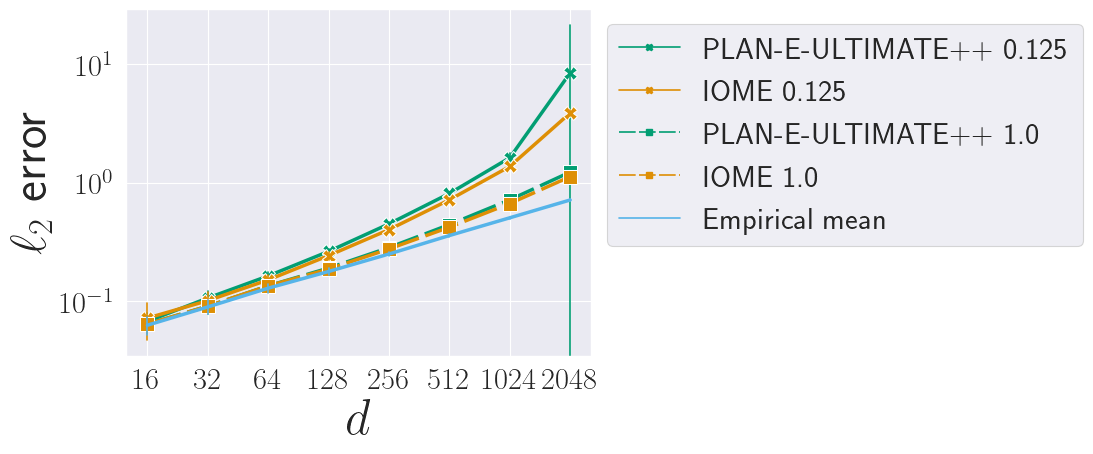

In [17]:
plt.rcParams['figure.figsize'] = figsize
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
plt.rcParams['font.weight'] = 'bold'
plt.rc('text', usetex=True)

sns.set_theme(style='darkgrid', palette='muted', context='paper', font='sans-serif', font_scale=global_font_scale, color_codes=True)

marker_styles = ['X', 's', 'p', 'd', 'h', '.', 'D']
dash_styles = ['', (10, 2), (3, 1.25, 1.5, 1.25)]
marker_map = {}
dash_map = {}
for i, rho in enumerate(plot_df['rho'].astype(str).unique()):
    for label in [label for label in plot_df['Algorithm'].unique() if rho in label]:
        marker_map[label] = marker_styles[i%len(marker_styles)]
        dash_map[label] = dash_styles[i%len(dash_styles)]

g = sns.lineplot(data=plot_df, x=x, y='error', hue='Algorithm', style='Algorithm',
                 markers=marker_map, 
                 dashes=dash_map,
                 errorbar='sd', #Plots error bars at +-1 std
                 err_style='bars',
                 estimator='mean',
                 ms=10,
                 palette={x:get_color(x) for x in plot_df['Algorithm'].unique()},
                 linewidth=thickness,
                )
if draw_empirical_mean:
    sns.lineplot(data=empirical_means_df, x=x, y='error', hue='Algorithm', style='Algorithm',
                     errorbar='sd', #Plots error bars at +-1 std
                     err_style='bars',
                     estimator='mean',
                     ms=10,
                     palette={x:get_color(x) for x in empirical_means_df['Algorithm'].unique()},
                     linewidth=thickness,
                    )

g.legend().set_title(None)
sns.move_legend(g, 'upper left', bbox_to_anchor=(1, 1))
if no_legend:
    g.legend().remove()
    
    
g.set_xscale(xscale)
g.set_yscale(yscale)
g.set_ylabel(r'$\ell_2$ error', fontsize=fontsize)
g.set_xlabel(xlabel, fontsize=fontsize)
g.set_xticks(xticks)
g.set_xticklabels(['$'+str(label)+'$' for label in xticks]) #Retain math formatting when forcing labels

g
g.figure.savefig(plot_name,bbox_inches='tight', pad_inches=0.5)

# The binary case

## Real-World Data

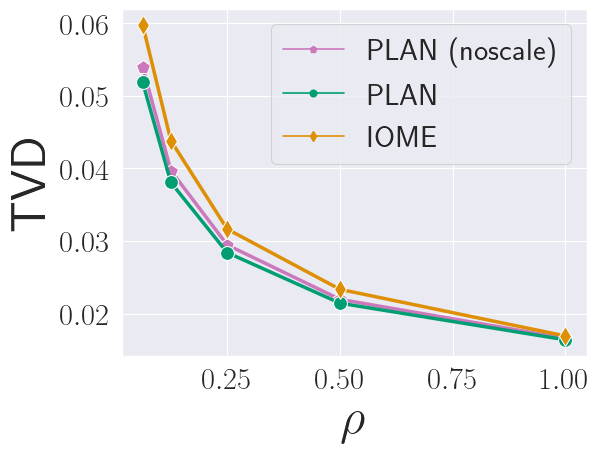

In [18]:

csv = '../experiments_results/{bincase}/dataframe.csv'.format(bincase=bincase)
plot_name = '../experiments_results/{bincase}/{bincase}.pdf'.format(bincase=bincase)
df = pd.read_csv(csv)
plot_df = df[['label', 'rho', 'error']].groupby(['label', 'rho']).mean().reset_index()
plot_df = plot_df[~plot_df.label.str.contains("unclipped")]
plot_df = plot_df[~plot_df.label.str.contains("oracle")]

plot_df = plot_df.replace('PLAN(paper)-clipped', us)
plot_df = plot_df.replace('PLAN(noscale)-clipped', us_noscale)
plot_df = plot_df.replace('rr', them)
plot_df = plot_df.replace('instance optimal', them)


x = 'rho'
xlabel = '$\\rho$'
xscale = 'linear'
yscale = 'linear' # 'log' | 'linear'

plt.rcParams['figure.figsize'] = figsize
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
plt.rcParams['font.weight'] = 'bold'
#plt.rc('text', usetex=False)
plt.rc('text', usetex=True)

sns.set_theme(style='darkgrid', palette='muted', context='paper', font='sans-serif', font_scale=global_font_scale, color_codes=True)

marker_map = {us:'o', them:'d', us_noscale: 'p'}

g = sns.lineplot(data=plot_df, x=x, y='error', hue="label", style='label', dashes=False, ms=10,
                 palette={us:us_color,them:them_color,us_noscale: us_noscale_color},
                 linewidth=thickness,
                 markers=marker_map,
                )

g.legend().set_title(None)
if no_legend:
    g.legend().remove()
g.set_xscale(xscale)
g.set_yscale(yscale)
g.set_ylabel(r'TVD', fontsize=fontsize)
g.set_xlabel(xlabel, fontsize=fontsize)

g
g.figure.savefig(plot_name,bbox_inches='tight', pad_inches=0.5)

In [19]:
plot_name

'../experiments_results/POS/POS.pdf'

# Run time

In [20]:

csv = '../experiments_results/{bincase}/dataframe.csv'.format(bincase=bincase)
plot_name = '../experiments_results/{bincase}/{bincase}.pdf'.format(bincase=bincase)
df = pd.read_csv(csv)


In [21]:
plan = 'PLAN(paper)-unclipped'
iome = 'instance optimal'
df[(df.label == iome)].describe()

,Unnamed: 0,run,error,rho,time
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,369.000000,0.500000,0.035104,0.387500,280.438108
std,184.851292,0.527046,0.016112,0.359398,5.303539
min,120.000000,0.000000,0.016846,0.062500,274.331813
25%,244.500000,0.000000,0.023198,0.125000,275.841202
50%,369.000000,0.500000,0.031644,0.250000,278.956601
75%,493.500000,1.000000,0.044278,0.500000,285.230985
max,618.000000,1.000000,0.060344,1.000000,288.724373


## Synthetic Data

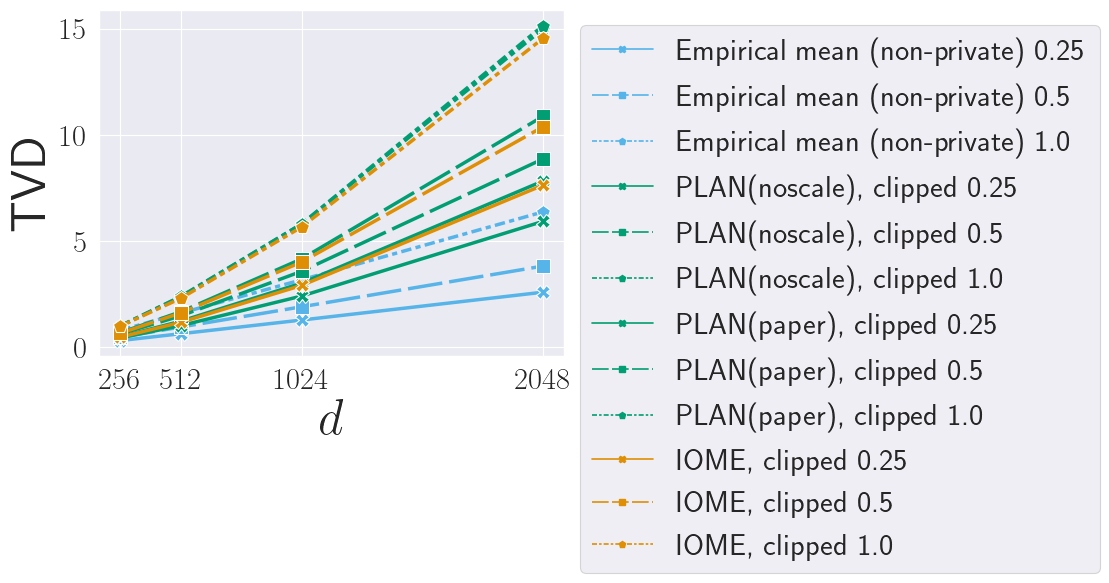

In [22]:
case = 'synthetic'


csv = '../experiments_results/{case}/dataframe.csv'.format(case=case)
plot_name = '../experiments_results/{case}/{case}.pdf'.format(case=case)
df = pd.read_csv(csv)
plot_df = df[['label', 'd', 'n', 'rho', 'ratio', 'error']].groupby(['label', 'd', 'n', 'rho', 'ratio']).mean().reset_index()

plot_df = plot_df[~plot_df.label.str.contains("unclipped")]
plot_df = plot_df[~plot_df.label.str.contains("oracle")]


x = 'd'
xlabel = '$d$'
xscale = 'linear'
yscale = 'linear' # 'log' | 'linear'
xticks = [256, 512, 1024, 2048]

#alpha = 0.0
rho = 0.5

plot_df = plot_df[(plot_df.rho == rho)]
plot_df = plot_df[plot_df.ratio.isin(display_ratios)]

plot_df['plot_label'] = plot_df['label'].str.replace(", clipped", " ")
plot_df['plot_label'] = plot_df['label'].str.strip()
plot_df['plot_label'] = plot_df['plot_label'].str.replace('instance optimal', them) + ' ' + plot_df['ratio'].astype(str)


plt.rcParams['figure.figsize'] = figsize
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = fontsize

plt.rc('text', usetex=True)

sns.set_theme(style='darkgrid', palette='muted', context='paper', font='sans-serif', font_scale=global_font_scale, color_codes=True)

marker_styles = ['X', 's', 'p', 'd', 'h', '.', 'D']
dash_styles = ['', (10, 2), (3, 1.25, 1.5, 1.25)]
marker_map = {}
dash_map = {}
for i, ratio in enumerate(plot_df['ratio'].astype(str).unique()):
    for label in [label for label in plot_df['plot_label'].unique() if ratio in label]:
        marker_map[label] = marker_styles[i%len(marker_styles)]
        dash_map[label] = dash_styles[i%len(dash_styles)]

g = sns.lineplot(data=plot_df, x=x, y='error', hue='plot_label', style='plot_label', dashes=dash_map, ms=10,
                 markers=marker_map,
                 palette={x:get_color(x) for x in plot_df['plot_label'].unique()},
                 linewidth=thickness,
                )


g.legend().set_title(None)
sns.move_legend(g, 'upper left', bbox_to_anchor=(1, 1))
if no_legend:
    g.legend().remove()
g.set_xscale(xscale)
g.set_yscale(yscale)
g.set_ylabel(r'TVD', fontsize=fontsize)
g.set_xlabel(xlabel, fontsize=fontsize)
g.set_xticks(xticks)

g
g.figure.savefig(plot_name,bbox_inches='tight', pad_inches=0.5)